<a href="https://colab.research.google.com/github/ramak7262/Chatbot-Customer-Service-/blob/main/Chatbot_for_Customer_Service_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🤖 Chatbot for Customer Service
1. Install & Import Libraries

In [ ]:
# ===============================
# 1. Install & Import Libraries
# ===============================

import numpy as np
import random
import json
import nltk
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2. Prepare Dataset (Intents.json)

In [ ]:

intents = {
  "intents": [
    {
      "tag": "greeting",
      "patterns": [
        "Hi",
        "Hello",
        "Hey",
        "Good morning",
        "Good evening",
        "Hi there",
        "Hello bot",
        "Hey chatbot"
      ],
      "responses": [
        "Hello! How can I help you today?",
        "Hi there! What can I do for you?",
        "Hey! How may I assist you with your order or product queries?"
      ]
    },
    {
      "tag": "goodbye",
      "patterns": [
        "Bye",
        "See you later",
        "Goodbye",
        "Talk to you soon",
        "See you",
        "I am leaving now"
      ],
      "responses": [
        "Goodbye! Have a nice day!",
        "See you soon!",
        "Thanks for visiting us. Have a great day!"
      ]
    },
    {
      "tag": "thanks",
      "patterns": [
        "Thanks",
        "Thank you",
        "That's helpful",
        "Thanks a lot",
        "I appreciate it",
        "Thank you so much"
      ],
      "responses": [
        "You're welcome!",
        "Happy to help!",
        "Anytime! Let me know if you need anything else."
      ]
    },
    {
      "tag": "stop",
      "patterns": [
        "stop",
        "exit",
        "quit",
        "end chat",
        "close",
        "that's enough",
        "I want to stop",
        "I am done"
      ],
      "responses": [
        "Okay, ending the chat. If you need anything else, just start a new conversation!",
        "Chat closed. Have a great day!"
      ]
    },
    {
      "tag": "product_query",
      "patterns": [
        "What products do you offer?",
        "Tell me about your services",
        "Do you have laptops?",
        "What do you sell?",
        "Show me your products",
        "Do you have mobile phones?",
        "Do you sell accessories?"
      ],
      "responses": [
        "We offer laptops, phones, and accessories.",
        "Our products include laptops, smartphones, and tech accessories. We also provide tech support and repair services."
      ]
    },
    {
      "tag": "hours",
      "patterns": [
        "What are your hours?",
        "When are you open?",
        "Opening hours?",
        "Working hours?",
        "Are you open today?",
        "Store timing"
      ],
      "responses": [
        "We are open from 9 AM to 6 PM, Monday to Saturday.",
        "Our business hours are 9 AM to 6 PM, Monday through Saturday."
      ]
    },
    {
      "tag": "payments",
      "patterns": [
        "Do you accept credit cards?",
        "Can I pay with PayPal?",
        "Payment options?",
        "How can I pay?",
        "Do you accept UPI?",
        "What are the available payment modes?"
      ],
      "responses": [
        "We accept credit cards, debit cards, PayPal, and UPI payments.",
        "You can pay using credit card, debit card, PayPal, or UPI."
      ]
    },
    {
      "tag": "order_tracking",
      "patterns": [
        "Where is my order?",
        "Track my order",
        "Order status",
        "Has my package shipped?",
        "Check my order",
        "Can you track my order?",
        "What is the status of my order?"
      ],
      "responses": [
        "I can help you with that. Please provide your order ID to check the current status.",
        "Sure! Share your order ID and I’ll check the tracking details for you."
      ]
    },
    {
      "tag": "complaint",
      "patterns": [
        "I want to file a complaint",
        "I am not happy with the product",
        "I received a damaged product",
        "My item is not working",
        "I have an issue with my order",
        "I want to report a problem"
      ],
      "responses": [
        "I'm sorry to hear that you faced an issue. Please share your order ID and briefly describe the problem.",
        "We apologize for the inconvenience. Kindly provide your order ID and details of the issue so we can assist you further."
      ]
    },
    {
      "tag": "refund_return",
      "patterns": [
        "I want to return my product",
        "How do I apply for a refund?",
        "Return policy",
        "Refund policy",
        "Can I get my money back?",
        "I want to replace my item",
        "How do returns work?"
      ],
      "responses": [
        "We offer a 7-day return and refund policy on most products. Please provide your order ID so we can check eligibility.",
        "You can request a return or refund within 7 days of delivery. Share your order ID and I’ll guide you through the process."
      ]
    },
    {
      "tag": "pricing_availability",
      "patterns": [
        "How much does this cost?",
        "What is the price of this?",
        "Price of laptop",
        "Is this item available?",
        "Do you have this in stock?",
        "Is this product in stock?",
        "Availability of this product"
      ],
      "responses": [
        "Please mention the product name or model so I can check the price and availability.",
        "Kindly share the exact product name or code, and I’ll provide you with the latest price and stock details."
      ]
    },
    {
      "tag": "shipping_delivery",
      "patterns": [
        "How long does delivery take?",
        "Shipping charges?",
        "Do you deliver to my location?",
        "Do you deliver to Hyderabad?",
        "Is same-day delivery available?",
        "Delivery time",
        "What are your shipping options?"
      ],
      "responses": [
        "Standard delivery usually takes 3–5 business days. Shipping charges may vary based on your location.",
        "We offer standard delivery within 3–5 days. Please share your pincode so I can confirm delivery options and charges."
      ]
    },
    {
      "tag": "warranty_repair",
      "patterns": [
        "Warranty details",
        "Do you provide repair service?",
        "How long is the warranty?",
        "My laptop needs repair",
        "Is there any warranty on this product?",
        "Can you repair my device?",
        "Service center details"
      ],
      "responses": [
        "Most of our products come with a 1-year manufacturer warranty. Please share your product and order details for exact information.",
        "Yes, we do provide repair and warranty support. Please provide your product model and order ID so we can guide you further."
      ]
    },
    {
      "tag": "contact_support",
      "patterns": [
        "I want to talk to a human",
        "Connect me to support",
        "Customer care number",
        "Can I talk to an agent?",
        "Give me your contact details",
        "Support email",
        "How can I contact you?"
      ],
      "responses": [
        "You can contact our support team at support@example.com or call +91-XXXXXXXXXX.",
        "I’m transferring your request to a human agent. Meanwhile, you can also reach us at support@example.com."
      ]
    },
    {
      "tag": "store_location",
      "patterns": [
        "Where is your store?",
        "Store location",
        "Shop address",
        "Do you have any branch near me?",
        "What is your address?"
      ],
      "responses": [
        "Our main store is located at XYZ Street, ABC City. You can also visit our website for the exact map and directions.",
        "We are based in ABC City at XYZ Road. For directions, please check our location on Google Maps."
      ]
    },
    {
      "tag": "smalltalk",
      "patterns": [
        "How are you?",
        "What can you do?",
        "Who are you?",
        "Are you a bot?",
        "Tell me about yourself"
      ],
      "responses": [
        "I’m a customer service chatbot here to help you with orders, products, payments, returns, and more.",
        "I’m an AI assistant designed to answer your questions about our products, orders, payments, shipping, and support."
      ]
    },
    {
      "tag": "unknown",
      "patterns": [
        "random text",
        "blabla",
        "askjdhakjsdh"
      ],
      "responses": [
        "I'm sorry, I didn't understand that. Could you please rephrase your question?",
        "I’m not sure I got that. Can you try asking in a different way?",
        "Sorry, I couldn’t understand. You can ask me about orders, products, payments, returns, or support."
      ]
    }
  ]
}

with open("intents.json", "w") as f:
    json.dump(intents, f, indent=2)

print("✅ intents.json file created with ALL customer service intents!")

✅ intents.json file created with ALL customer service intents!


3. Data Preprocessing

In [ ]:
# ===============================
# 3. Data Preprocessing
# ===============================

with open('intents.json') as file:
    data = json.load(file)

words = []
classes = []
documents = []
ignore_letters = ['?', '!', '.', ',']

for intent in data['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize, lowercase, remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

print("🔤 Words:", words)
print("🏷️ Classes (intents):", classes)

🔤 Words: ["'s", 'a', 'about', 'accept', 'accessory', 'address', 'agent', 'am', 'an', 'any', 'apply', 'appreciate', 'are', 'askjdhakjsdh', 'availability', 'available', 'back', 'blabla', 'bot', 'branch', 'bye', 'can', 'card', 'care', 'center', 'charge', 'chat', 'chatbot', 'check', 'close', 'complaint', 'connect', 'contact', 'cost', 'credit', 'customer', 'damaged', 'deliver', 'delivery', 'detail', 'device', 'do', 'doe', 'done', 'email', 'end', 'enough', 'evening', 'exit', 'file', 'for', 'get', 'give', 'good', 'goodbye', 'ha', 'happy', 'have', 'hello', 'helpful', 'hey', 'hi', 'hour', 'how', 'human', 'hyderabad', 'i', 'in', 'is', 'issue', 'it', 'item', 'laptop', 'later', 'leaving', 'location', 'long', 'lot', 'me', 'mobile', 'mode', 'money', 'morning', 'much', 'my', 'near', 'need', 'not', 'now', 'number', 'of', 'offer', 'on', 'open', 'opening', 'option', 'order', 'package', 'pay', 'payment', 'paypal', 'phone', 'policy', 'price', 'problem', 'product', 'provide', 'quit', 'random', 'received', 

4. Training Data Preparation

In [ ]:
# ===============================
# 4. Training Data Preparation
# ===============================

training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in doc[0]]
    for w in words:
        bag.append(1 if w in word_patterns else 0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)

train_x = np.array([item[0] for item in training])
train_y = np.array([item[1] for item in training])

print("✅ Training data prepared. Shape:", train_x.shape, train_y.shape)

✅ Training data prepared. Shape: (108, 158) (108, 17)


5. Build and Train Model

In [ ]:
# ===============================
# 5. Build and Train Model
# ===============================

model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1, validation_split=0.2)

model.save("chatbot_model.h5")
print("✅ Model Trained & Saved as chatbot_model.h5")

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0146 - loss: 2.9043 - val_accuracy: 0.0909 - val_loss: 2.8449
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0156 - loss: 2.8356 - val_accuracy: 0.0455 - val_loss: 2.8327
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1405 - loss: 2.7672 - val_accuracy: 0.0000e+00 - val_loss: 2.8233
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0863 - loss: 2.7606 - val_accuracy: 0.0000e+00 - val_loss: 2.8070
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1666 - loss: 2.6951 - val_accuracy: 0.0000e+00 - val_loss: 2.7892
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1230 - loss: 2.6978 - val_accuracy: 0.0455 - val_loss: 2.7743
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2137 - loss: 2.6327 - val_accuracy: 0.1364 - val_loss: 2.7580
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2599 - loss: 2.6067 - val_accuracy: 0.1364 - 

✅ Model Trained & Saved as chatbot_model.h5


6. Plot Training Accuracy & Loss

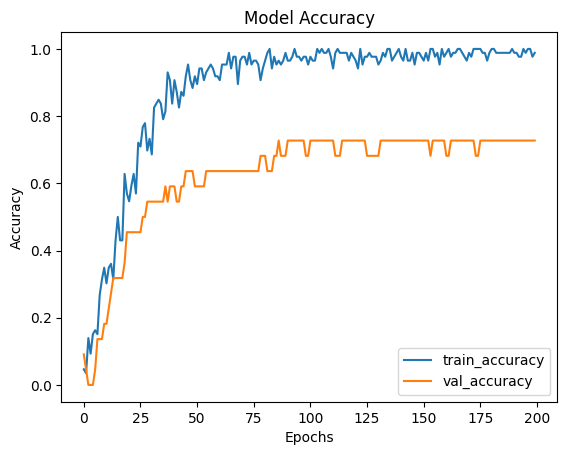

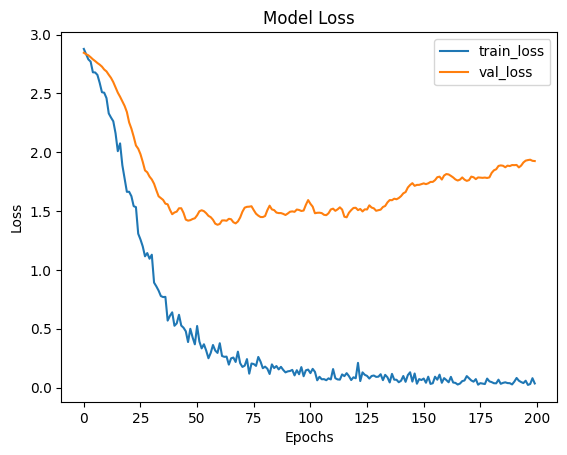

In [ ]:
# ===============================
# 6. Plot Training Accuracy & Loss
# ===============================

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

7. Chatbot Response Function

In [ ]:
# ===============================
# 7. Chatbot Response Functions
# ===============================

def clean_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bag_of_words(sentence, words):
    sentence_words = clean_sentence(sentence)
    bag = [0] * len(words)
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s:
                bag[i] = 1
    return np.array(bag)

def predict_class(sentence):
    bow = bag_of_words(sentence, words)
    res = model.predict(np.array([bow]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def get_response(intents_list, intents_json):
    if len(intents_list) == 0:
        # Try to use 'unknown' intent if present
        for i in intents_json["intents"]:
            if i["tag"] == "unknown":
                return i["responses"][0]
        return "Sorry, I didn’t understand that."
    tag = intents_list[0]['intent']
    for i in intents_json['intents']:
        if i['tag'] == tag:
            return i['responses'][0]

def chatbot_response(msg):
    ints = predict_class(msg)
    res = get_response(ints, data)
    return res, ints

8. Test the Chatbot

In [ ]:

# ===============================
# 8. Test the Chatbot (Console Chat)
# ===============================

print("\n🤖 Chatbot is ready! Type 'quit' to exit.\n")
while True:
    msg = input("You: ")
    if msg.lower() == "quit":
        print("Bot: Chat ended. Bye!")
        break

    response, intents_list = chatbot_response(msg)
    print("Bot:", response)

    # If top intent is 'stop', end chat automatically
    if len(intents_list) > 0 and intents_list[0]["intent"] == "stop":
        print("Bot: Chat stopped based on your request.")
        break


🤖 Chatbot is ready! Type 'quit' to exit.

You: hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Bot: Hello! How can I help you today?
You: where is my order
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Bot: I can help you with that. Please provide your order ID to check the current status.
You: Order status
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Bot: I can help you with that. Please provide your order ID to check the current status.
You: I want to file a complaint
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Bot: You can contact our support team at support@example.com or call +91-XXXXXXXXXX.
You: My item is not working
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Bot: I'm sorry to hear that you faced an issue. Please share your order ID and briefly describe the problem.
You: My product arrived broken
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Bot: We offer a 7-day return and refund policy on most products. Please provide your order ID so we can check eligibility.
You: How much does this cost
1/1 ━━━━━━━━━━━━━━━━━━━━